In [5]:
!pip install torch

from transfer_learning import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mpl

mpl.rcParams.update(mpl.rcParamsDefault)

rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
mpl.rcParams['savefig.dpi'] = 1200
mpl.rcParams['text.usetex'] = True  # not really needed


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


In [6]:
# problem setup
p = 200

# generate source task data
beta_source = np.random.normal(0, 1, p)
num_samples_source = 400
sigma_source = 0.1
X_source, y_source = generate_LR_task_data(num_samples_source, p, beta_source, sigma_source)

# generate target task data
shift_scale = 0.1
shift = np.random.normal(0, shift_scale, p)
beta_target = beta_source + shift
num_samples_target = 200
sigma_target = 0.1
X_target, y_target = generate_LR_task_data(num_samples_target, p, beta_target, sigma_target)

# generate target target test data
num_samples_target_test = 1000
X_target_test, y_target_test = generate_LR_task_data(num_samples_target_test, p, beta_target, 0.0)

In [7]:
# Now vary shift scale and see how it affects test_mse
shift_scales = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5]
hps_results = {}
ols_results = {}

for scale in shift_scales:
    shift = np.random.normal(0, scale, p)
    beta_target = beta_source + shift
    X_target, y_target = generate_LR_task_data(num_samples_target, p, beta_target, sigma_target)

    X_target_test, y_target_test = generate_LR_task_data(num_samples_target_test, p, beta_target, 0.0)
    tests = X_target_test, y_target_test

    hps_inputs = X_source, y_source, X_target, y_target
    hps_test_mse = hps_estimator(hps_inputs, tests)
    hps_results[scale] = hps_test_mse

    ols_inputs = X_target, y_target
    ols_test_mse = ols_estimator(ols_inputs, tests)
    ols_results[scale] = ols_test_mse

HPS test MSE on target test data: 0.01422651367443138
OLS test MSE on target test data: 2.3849286522214217
HPS test MSE on target test data: 1.1378407333169147
OLS test MSE on target test data: 4.310915272357152
HPS test MSE on target test data: 5.330780480328569
OLS test MSE on target test data: 0.7394687676917524
HPS test MSE on target test data: 7.609842130067304
OLS test MSE on target test data: 2.5848180807121595
HPS test MSE on target test data: 14.238942233033766
OLS test MSE on target test data: 1186.6825381118274
HPS test MSE on target test data: 24.024207224080318
OLS test MSE on target test data: 10.199109441335173


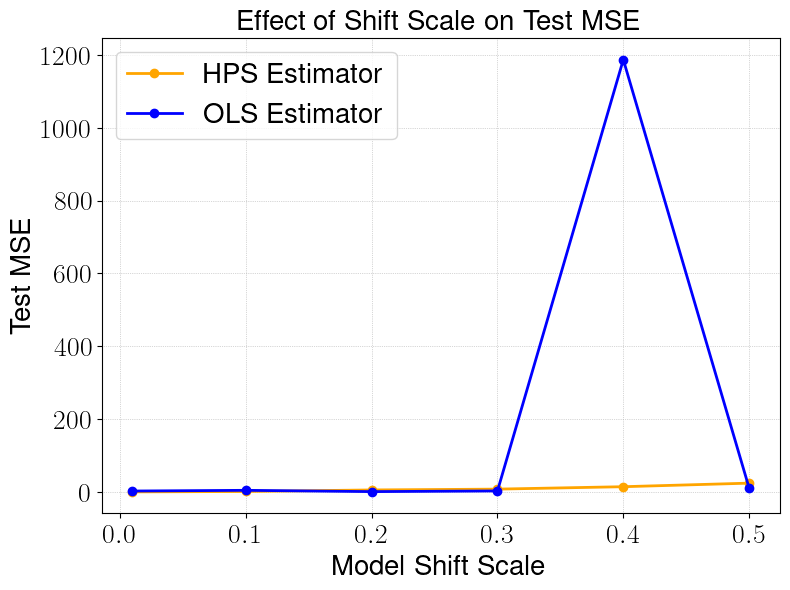

In [8]:
# Now draw a plot of shift_scale vs test_mse

scales = list(hps_results.keys())

hps_mses = [hps_results[scale] for scale in scales]
ols_mses = [ols_results[scale] for scale in scales]

plt.figure(figsize=(8,6))
plt.plot(scales, hps_mses, lw = 2, marker='o', c='orange', label='HPS Estimator')
plt.plot(scales, ols_mses, lw = 2, marker='o', c='blue', label='OLS Estimator')

plt.xlabel("Model Shift Scale", fontsize=20)
plt.ylabel("Test MSE", fontsize=20)
plt.title("Effect of Shift Scale on Test MSE", fontsize=20)
plt.legend(fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(lw=0.5, ls=":")
plt.tight_layout()
plot_name = f"../figures/model_shift.pdf"
plt.savefig(plot_name, bbox_inches='tight', format="pdf", dpi=1200)

plt.show()
plt.close()

In [9]:
# Next we set the model shift scale small, and instead vary the covariance matrix of the feature vectors

# In the source task, we set the condition matrix to be a rank-r matrix with trace equal to p

covariate_shift_scales = [int(p / 20) * i for i in range(1, 21)]
hps_results = []
ols_results = []

model_shift = np.random.normal(0, 0.100, p)
X_target, y_target = generate_LR_task_data(num_samples_target, p, beta_source + model_shift, sigma_target)
X_target_test, y_target_test = generate_LR_task_data(num_samples_target_test, p, beta_source + model_shift, 0.0)
tests = X_target_test, y_target_test

for r in covariate_shift_scales:
    condition_matrix = generate_condition_matrix(p, r)
    X_source, y_source = generate_LR_conditioned_task_data(num_samples_source, p, beta_source, sigma_source, condition_matrix)

    hps_inputs = X_source, y_source, X_target, y_target
    hps_test_mse = hps_estimator(hps_inputs, tests)
    hps_results.append(hps_test_mse)

    ols_inputs = X_target, y_target
    ols_test_mse = ols_estimator(ols_inputs, tests)
    ols_results.append(ols_test_mse)

HPS test MSE on target test data: 1.6670356482322126
OLS test MSE on target test data: 1.9304273888358394
HPS test MSE on target test data: 1.6723217976140445
OLS test MSE on target test data: 1.9304273888358394
HPS test MSE on target test data: 3.158864988183569
OLS test MSE on target test data: 1.9304273888358394
HPS test MSE on target test data: 1.4059721103527671
OLS test MSE on target test data: 1.9304273888358394
HPS test MSE on target test data: 1.1811609120934237
OLS test MSE on target test data: 1.9304273888358394
HPS test MSE on target test data: 1.6125651724717334
OLS test MSE on target test data: 1.9304273888358394
HPS test MSE on target test data: 1.9705921923062297
OLS test MSE on target test data: 1.9304273888358394
HPS test MSE on target test data: 1.5876209708789646
OLS test MSE on target test data: 1.9304273888358394
HPS test MSE on target test data: 1.9860347737967694
OLS test MSE on target test data: 1.9304273888358394
HPS test MSE on target test data: 1.40904982533

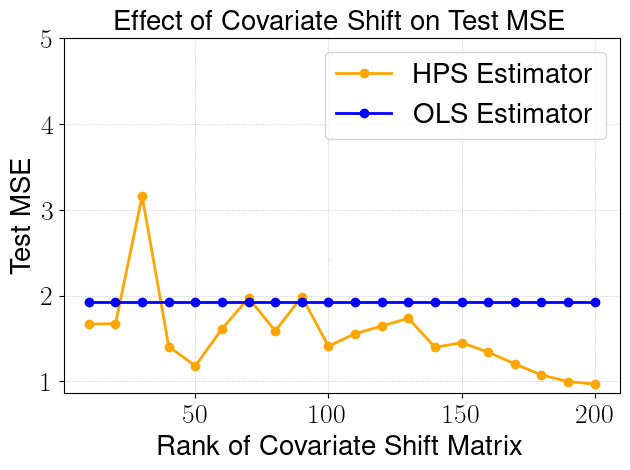

In [10]:
#plt.figure(figsize=(8,6))

plt.plot(covariate_shift_scales, hps_results, lw = 2, marker='o', c='orange', label='HPS Estimator')
plt.plot(covariate_shift_scales, ols_results, lw = 2, marker='o', c='blue', label='OLS Estimator')
plt.xlabel("Rank of Covariate Shift Matrix", fontsize=20)
plt.ylabel("Test MSE", fontsize=20)
plt.title("Effect of Covariate Shift on Test MSE", fontsize=20)
plt.legend(fontsize=20)

plt.xticks([50, 100, 150, 200], fontsize=20)
plt.yticks([1.0, 2.0, 3.0, 4.0, 5.0], fontsize=20)
plt.grid(lw=0.5, ls=":")
plt.tight_layout()
plot_name = f"../figures/covariate_shift.pdf"
plt.savefig(plot_name, bbox_inches='tight', format="pdf", dpi=1200)

plt.show()
plt.close()

In [11]:
sps_inputs = X_source, y_source, X_target, y_target

tests = X_target_test, y_target_test

sps_estimator(sps_inputs, tests, p)

torch.Size([400, 200])


In [12]:
p

200